# Analysis of T1 and T2 parameters of oranges in a NMR experiment

## Creation of the raw data lists

In [1]:
import image_array_creation
from pathlib import Path


t1_data_path = Path(r"C:/Users/juanr/Desktop/Universidad/Master/Practicas/programa calculo t1t2/NMR-t1-t2-calculator/rawdata/")
t2_data_path = Path(r"C:/Users/juanr/Desktop/Universidad/Master/Practicas/programa calculo t1t2/NMR-t1-t2-calculator/t2_raw_data/")

t1_onlyfiles = [str(pp) for pp in t1_data_path.glob("**/*.mat")]
t2_onlyfiles = [str(pp) for pp in t2_data_path.glob("**/*.mat")]

t1_image_array = image_array_creation.create_image_array(t1_onlyfiles,'image3D')
t2_image_array = image_array_creation.create_image_array(t2_onlyfiles,'imagen')

## Creation of the proper oranges numpy arrays

In [2]:
import separator
import numpy as np

# We create the separated arrays of T1 and T2

separated_arrays = separator.separate_t1_t2(t1_image_array)
t1_list = separated_arrays[0]
t2_oranges_list = separated_arrays[1]

# We turn them into numpy arrays

t1 = np.asarray(t1_list)
t2 = np.asarray(t2_image_array)
t2_oranges = np.asarray(t2_oranges_list)

t1_orange_seedless = t1[0:11]
t1_orange_seeds = t1[11:22]

## Orange masks

In [3]:
import numpy as np

orange_seeds_mask = np.where(np.abs(t1_orange_seeds) < 0.0005,0,1)
orange_seedless_mask = np.where(np.abs(t1_orange_seedless) < 0.0005,0,1)

## T1 image creation for the oranges

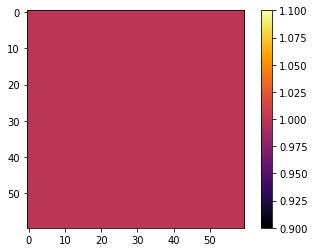

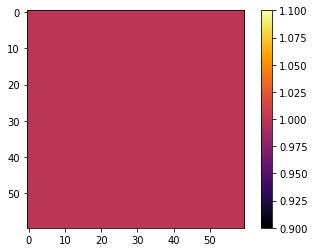

In [5]:
import T1_creation
import numpy as np
import matplotlib.pyplot as plt

t1_seeds_image = T1_creation.create_T1_image(orange_seeds_mask,np.abs(t1_orange_seeds))
t1_seedless_image = T1_creation.create_T1_image(orange_seedless_mask,np.abs(t1_orange_seedless))

plt.figure(1)
plt.imshow(np.abs(t1_seedless_image), cmap='inferno')
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(np.abs(t1_seedless_image), cmap='inferno')
plt.colorbar()
plt.show()